# Import The Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

%matplotlib inline

from glob import glob
from PIL import Image

In [4]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')


In [5]:
female

['./data/crop/female_crop\\Female Faces_0.png',
 './data/crop/female_crop\\Female Faces_1.png',
 './data/crop/female_crop\\Female Faces_100.png',
 './data/crop/female_crop\\Female Faces_1000.png',
 './data/crop/female_crop\\Female Faces_1002.png',
 './data/crop/female_crop\\Female Faces_1003.png',
 './data/crop/female_crop\\Female Faces_1004.png',
 './data/crop/female_crop\\Female Faces_1005.png',
 './data/crop/female_crop\\Female Faces_1006.png',
 './data/crop/female_crop\\Female Faces_1008.png',
 './data/crop/female_crop\\Female Faces_1009.png',
 './data/crop/female_crop\\Female Faces_1010.png',
 './data/crop/female_crop\\Female Faces_1011.png',
 './data/crop/female_crop\\Female Faces_1013.png',
 './data/crop/female_crop\\Female Faces_1014.png',
 './data/crop/female_crop\\Female Faces_1015.png',
 './data/crop/female_crop\\Female Faces_1016.png',
 './data/crop/female_crop\\Female Faces_1017.png',
 './data/crop/female_crop\\Female Faces_1018.png',
 './data/crop/female_crop\\Female Face

In [6]:
male

['./data/crop/male_crop\\male Faces_0.png',
 './data/crop/male_crop\\male Faces_1.png',
 './data/crop/male_crop\\male Faces_10.png',
 './data/crop/male_crop\\male Faces_100.png',
 './data/crop/male_crop\\male Faces_1000.png',
 './data/crop/male_crop\\male Faces_1001.png',
 './data/crop/male_crop\\male Faces_1003.png',
 './data/crop/male_crop\\male Faces_1004.png',
 './data/crop/male_crop\\male Faces_1005.png',
 './data/crop/male_crop\\male Faces_1006.png',
 './data/crop/male_crop\\male Faces_1007.png',
 './data/crop/male_crop\\male Faces_1008.png',
 './data/crop/male_crop\\male Faces_101.png',
 './data/crop/male_crop\\male Faces_1011.png',
 './data/crop/male_crop\\male Faces_1012.png',
 './data/crop/male_crop\\male Faces_1016.png',
 './data/crop/male_crop\\male Faces_1017.png',
 './data/crop/male_crop\\male Faces_1018.png',
 './data/crop/male_crop\\male Faces_1021.png',
 './data/crop/male_crop\\male Faces_1022.png',
 './data/crop/male_crop\\male Faces_1026.png',
 './data/crop/male_crop

In [7]:
path = male + female

In [8]:
len(path)

3897

# How To Handle The Size O f Image

In [9]:
img = Image.open(path[0]) # To ge


In [10]:
img.size

(410, 410)

In [11]:
def getSize(path):
    img = Image.open(path)
    return img.size[0]

# Import Image Through Pandas Library

In [12]:
df = pd.DataFrame(data = path, columns = ['path']) # to get the path and column of image

In [13]:
df.head() # show the first five rows

,path
0,./data/crop/male_crop\male Faces_0.png
1,./data/crop/male_crop\male Faces_1.png
2,./data/crop/male_crop\male Faces_10.png
3,./data/crop/male_crop\male Faces_100.png
4,./data/crop/male_crop\male Faces_1000.png


In [14]:
df.tail() # show the last 5 rows

,path
3892,./data/crop/female_crop\female_93.png
3893,./data/crop/female_crop\female_94.png
3894,./data/crop/female_crop\female_95.png
3895,./data/crop/female_crop\female_98.png
3896,./data/crop/female_crop\female_99.png


In [15]:
df['size'] = df['path'].apply(getSize) # to get the size of image

In [16]:
df.head()

,path,size
0,./data/crop/male_crop\male Faces_0.png,410
1,./data/crop/male_crop\male Faces_1.png,615
2,./data/crop/male_crop\male Faces_10.png,615
3,./data/crop/male_crop\male Faces_100.png,54
4,./data/crop/male_crop\male Faces_1000.png,410


# Perform The EDA (Exploratory Data Analysis)

In [17]:
df.describe()

,size
count,3897.000000
mean,530.124968
std,416.170599
min,24.000000
25%,273.000000
50%,410.000000
75%,615.000000
max,3114.000000


<Axes: >

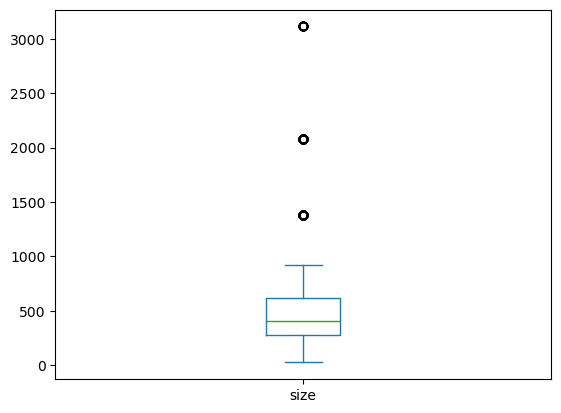

In [18]:
df['size'].plot(kind = 'box') # show the size of image in boxplot

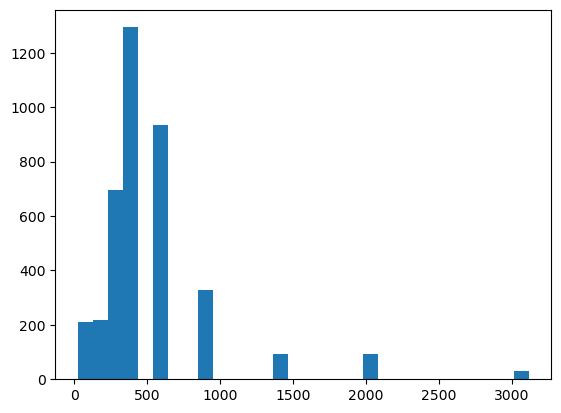

In [19]:
plt.hist(df['size'], bins = 30) # Show the size of image in barplot
plt.show()

In [20]:
df_new = df[df['size']>60] # show the size of image less than 60

In [21]:
df_new

,path,size
0,./data/crop/male_crop\male Faces_0.png,410
1,./data/crop/male_crop\male Faces_1.png,615
2,./data/crop/male_crop\male Faces_10.png,615
4,./data/crop/male_crop\male Faces_1000.png,410
5,./data/crop/male_crop\male Faces_1001.png,182
...,...,...
3892,./data/crop/female_crop\female_93.png,410
3893,./data/crop/female_crop\female_94.png,923
3894,./data/crop/female_crop\female_95.png,615
3895,./data/crop/female_crop\female_98.png,410


In [22]:
string = df_new['path'][0] 

In [23]:
string

'./data/crop/male_crop\\male Faces_0.png'

In [24]:
def gender (string): # split the image of gender
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [25]:
df['gender'] = df['path'].apply(gender) # add the gender

In [26]:
df

,path,size,gender
0,./data/crop/male_crop\male Faces_0.png,410,male
1,./data/crop/male_crop\male Faces_1.png,615,male
2,./data/crop/male_crop\male Faces_10.png,615,male
3,./data/crop/male_crop\male Faces_100.png,54,male
4,./data/crop/male_crop\male Faces_1000.png,410,male
...,...,...,...
3892,./data/crop/female_crop\female_93.png,410,female
3893,./data/crop/female_crop\female_94.png,923,female
3894,./data/crop/female_crop\female_95.png,615,female
3895,./data/crop/female_crop\female_98.png,410,female


# Normalization of Gender

In [27]:
print(df['gender'].value_counts(normalize = True)) # normalization of gender data of images

female    0.581473
male      0.418527
Name: gender, dtype: float64


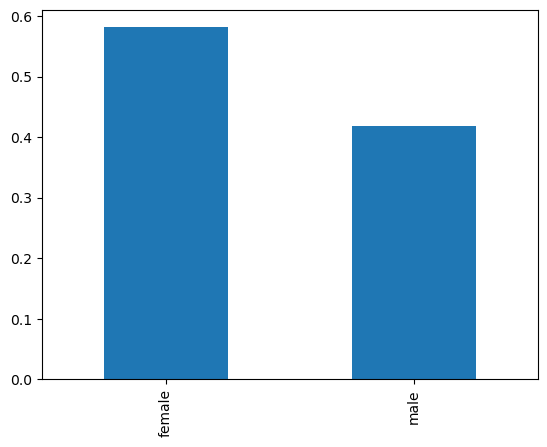

In [28]:
df['gender'].value_counts(normalize = True).plot(kind = 'bar') # show the bar plot of gender normalization
plt.show()

In [29]:
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img, cv2.Color_BGR2GRAY)
        size = gray.shape[0]
        
        if size >= 100:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_AREA) # SHRINK
        else:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_CUBIC) #ENLARGE
        return gray_re.flatten()
    except:
        return None

In [30]:
result = resize_img(path[0])

if result is not None:
    # Now you can safely use len() on the result
    length_of_result = len(result)
    print(length_of_result)
else:
    print("The result is None. Check the implementation of resize_img.")


The result is None. Check the implementation of resize_img.


In [31]:
df_new

,path,size
0,./data/crop/male_crop\male Faces_0.png,410
1,./data/crop/male_crop\male Faces_1.png,615
2,./data/crop/male_crop\male Faces_10.png,615
4,./data/crop/male_crop\male Faces_1000.png,410
5,./data/crop/male_crop\male Faces_1001.png,182
...,...,...
3892,./data/crop/female_crop\female_93.png,410
3893,./data/crop/female_crop\female_94.png,923
3894,./data/crop/female_crop\female_95.png,615
3895,./data/crop/female_crop\female_98.png,410


In [32]:
df_new['gender'] = df_new['path'].apply(gender)

C:\Users\nazish\AppData\Local\Temp\ipykernel_18400\2870237434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


In [33]:
df_new.head()

,path,size,gender
0,./data/crop/male_crop\male Faces_0.png,410,male
1,./data/crop/male_crop\male Faces_1.png,615,male
2,./data/crop/male_crop\male Faces_10.png,615,male
4,./data/crop/male_crop\male Faces_1000.png,410,male
5,./data/crop/male_crop\male Faces_1001.png,182,male


In [34]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

C:\Users\nazish\AppData\Local\Temp\ipykernel_18400\2814634373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [35]:
df_new

,path,size,gender,structure_data
0,./data/crop/male_crop\male Faces_0.png,410,male,None
1,./data/crop/male_crop\male Faces_1.png,615,male,None
2,./data/crop/male_crop\male Faces_10.png,615,male,None
4,./data/crop/male_crop\male Faces_1000.png,410,male,None
5,./data/crop/male_crop\male Faces_1001.png,182,male,None
...,...,...,...,...
3892,./data/crop/female_crop\female_93.png,410,female,None
3893,./data/crop/female_crop\female_94.png,923,female,None
3894,./data/crop/female_crop\female_95.png,615,female,None
3895,./data/crop/female_crop\female_98.png,410,female,None


In [36]:
df1 = df_new['structure_data'].apply(pd.Series, dtype=float) # Separate show the structure data of images


In [37]:
df1

""
0
1
2
4
5
...
3892
3893
3894
3895


In [38]:
df2 = df_new['path'].apply(pd.Series) # Separate show the path of images

In [39]:
df2

,0
0,./data/crop/male_crop\male Faces_0.png
1,./data/crop/male_crop\male Faces_1.png
2,./data/crop/male_crop\male Faces_10.png
4,./data/crop/male_crop\male Faces_1000.png
5,./data/crop/male_crop\male Faces_1001.png
...,...
3892,./data/crop/female_crop\female_93.png
3893,./data/crop/female_crop\female_94.png
3894,./data/crop/female_crop\female_95.png
3895,./data/crop/female_crop\female_98.png


In [40]:
df3 = df_new['size'].apply(pd.Series) # Separate show the Size of images

In [41]:
df3

,0
0,410
1,615
2,615
4,410
5,182
...,...
3892,410
3893,923
3894,615
3895,410


In [42]:
df_new

,path,size,gender,structure_data
0,./data/crop/male_crop\male Faces_0.png,410,male,None
1,./data/crop/male_crop\male Faces_1.png,615,male,None
2,./data/crop/male_crop\male Faces_10.png,615,male,None
4,./data/crop/male_crop\male Faces_1000.png,410,male,None
5,./data/crop/male_crop\male Faces_1001.png,182,male,None
...,...,...,...,...
3892,./data/crop/female_crop\female_93.png,410,female,None
3893,./data/crop/female_crop\female_94.png,923,female,None
3894,./data/crop/female_crop\female_95.png,615,female,None
3895,./data/crop/female_crop\female_98.png,410,female,None


In [43]:
df4 = pd.concat((df_new['gender'],df1), axis = 1)

In [44]:
df4

,gender
0,male
1,male
2,male
4,male
5,male
...,...
3892,female
3893,female
3894,female
3895,female


TypeError: Image data of dtype <U38 cannot be converted to float

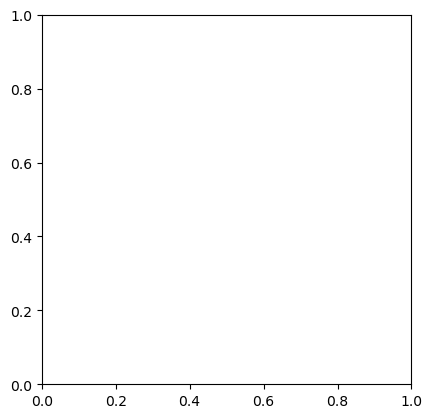

In [45]:
plt.imshow(df2.loc[0][0])
plt.title( df2.loc[0]['gender'])
plt.show()

In [ ]:
plt.imshow(df2.loc[0][0])
plt.title(df2.loc[0]['gender'])
plt.show()


In [ ]:
from PIL import Image

# Assuming you have the 'PIL' library installed, you can install it using: pip install pillow

# Get the image path from the DataFrame
image_path = str(df2.loc[0][0])

# Read the image using PIL
image = Image.open(image_path)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(df2.loc[0]['gender'])
plt.show()
